In [1]:
# import relevant modules
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn

# To display graphs in the notebook
import matplotlib.pyplot as plt
%matplotlib inline

# Import train_test_split function
from sklearn.model_selection import train_test_split

#Import the sklearn encoder
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

#Import the standered scaler for buliding the models 
from sklearn.preprocessing import StandardScaler

#Import Random Forest, Descision tree, Naive Bayes, SVM, K ML Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

#Importing the TPOT GA
from tpot import TPOTClassifier

#Import scikit-learn metrics module for accuracy calculation and confusion matrix 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Fine Tuning the models via Grid Search 

from sklearn.model_selection import GridSearchCV

C:\Users\GHOST\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
# Dataset field names
datacols = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

# Load NSL_KDD train dataset
kdd = pd.read_table("/Users/GHOST/Desktop/NSL-KDD/NSL-KDD+.CSV", sep=",")



In [4]:
kdd.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,0
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,1
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,1


In [5]:
kdd.shape

(47736, 42)

In [6]:
#Checking data types of varaibles,missing value presence and number of each data type
kdd.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47736 entries, 0 to 47735
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     47736 non-null  int64  
 1   protocol_type                47736 non-null  object 
 2   service                      47736 non-null  object 
 3   flag                         47736 non-null  object 
 4   src_bytes                    47736 non-null  int64  
 5   dst_bytes                    47736 non-null  int64  
 6   land                         47736 non-null  int64  
 7   wrong_fragment               47736 non-null  int64  
 8   urgent                       47736 non-null  int64  
 9   hot                          47736 non-null  int64  
 10  num_failed_logins            47736 non-null  int64  
 11  logged_in                    47736 non-null  int64  
 12  num_compromised              47736 non-null  int64  
 13  root_shell      

In [7]:
#Checking for presence of missing values results in the testing data is clean and does not contain missing value
kdd.isnull().any().value_counts()

False    42
dtype: int64

In [13]:
# This section of the code to create the dependent variable incorporating categories 
# As Normal or attack

#This is a list of which incorporates all types of attacks.
attack_type=['neptune','satan','ipsweep','portsweep','smurf','nmap','back','teardrop','warezclient','pod','guess_passwd',
             'buffer_overflow','warezmaster','land','imap','rootkit','loadmodule','ftp_write','multihop','phf','perl',
             'spy','mscan','apache2','processtable','snmpguess','saint','mailbomb','snmpgetattack ','httptunnel','named',
             'ps','sendmail','xterm','land','xsnoop','worm','sqlattack','udpstorm ']

In [14]:
#Creating our dependent variable for binomial classification for train data by assigning normal as 0 and any attack as 1
kdd['attack']=kdd['attack'].apply(lambda x:1 if x in attack_type else 0)


In [8]:
# This is brief look of the train data with binomial dependent variable
kdd.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,0
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,1
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,1


In [9]:
#Categorical distribution of attack varables in train data
kdd['attack'].value_counts()

1    24387
0    23349
Name: attack, dtype: int64

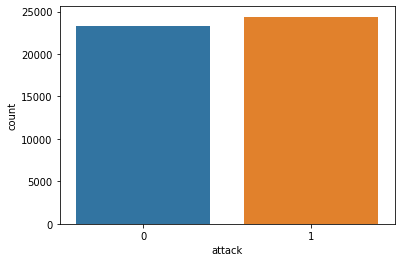

In [10]:
#Bar graph of attack variable in train data where 0 signifies normal and 1 signifies attack
sns.countplot(kdd['attack'])

In [11]:
#Creating dummy for the categorical variables for train data 

pd.get_dummies(kdd['protocol_type'],prefix='protocol_type',drop_first=True)
pd.get_dummies(kdd['service'],prefix='service',drop_first=True)
pd.get_dummies(kdd['flag'],prefix='flag',drop_first=True)


,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
47731,0,1,0,0,0,0,0,0,0,0
47732,0,0,0,0,0,0,0,0,1,0
47733,1,0,0,0,0,0,0,0,0,0
47734,0,0,0,0,1,0,0,0,0,0


In [12]:
# Concatinating dummy variable with actual train data

kdd = pd.concat([kdd,pd.get_dummies(kdd['protocol_type'], prefix='protocol_type')],axis=1)
kdd = pd.concat([kdd,pd.get_dummies(kdd['service'], prefix='service')],axis=1)
kdd = pd.concat([kdd,pd.get_dummies(kdd['flag'], prefix='flag')],axis=1)


kdd.drop(['protocol_type'],axis=1, inplace=True)
kdd.drop(['service'],axis=1, inplace=True)
kdd.drop(['flag'],axis=1, inplace=True)


In [13]:
#Brief look of our train data with encoded variables
kdd.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2,12983,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,15,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [14]:
# Train test split for model building for both training and testing datasets
# The target attack cloumun will be in the y_train 

X=kdd[kdd.columns.difference(['attack'])]
y=kdd['attack']

In [15]:
X.head()

,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,...,service_vmnet,service_whois,src_bytes,srv_count,srv_diff_host_rate,srv_rerror_rate,srv_serror_rate,su_attempted,urgent,wrong_fragment
0,229,0.06,0,255,0.06,1.00,0.00,0.04,0.0,10,...,0,0,0,10,0.00,1.0,0.00,0,0,0
1,136,0.06,0,255,0.06,1.00,0.00,0.00,0.0,1,...,0,0,0,1,0.00,1.0,0.00,0,0,0
2,1,0.00,0,134,0.04,0.00,0.61,0.61,0.0,86,...,0,0,12983,1,0.00,0.0,0.00,0,0,0
3,1,0.00,0,3,0.00,0.00,1.00,1.00,0.0,57,...,0,0,20,65,1.00,0.0,0.00,0,0,0
4,1,0.00,15,29,0.17,0.83,0.03,0.31,0.0,86,...,0,0,0,8,0.75,0.5,0.12,0,0,0


In [16]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: attack, dtype: int64

In [17]:
#importing train_test_split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [107]:
# There will be four sets of numbers of esitmators to test which one will gain the highest score
#Random Forrest Classifer 

rfc1=RandomForestClassifier()

#Fitting the model 

rfc1 = rfc1.fit(X_train,y_train)


In [108]:
#Model is predicting dependent variable values for test data

y_pred1=rfc1.predict(X_test)

In [109]:
y_pred1= rfc1.predict(X_test_scaled)

print(confusion_matrix(y_test,y_pred1))

print(classification_report(y_test,y_pred1))

print ('Random Forrest Grid Search Score :',accuracy_score(y_test, y_pred1))

[[4055  719]
 [ 296 4478]]
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      4774
           1       0.86      0.94      0.90      4774

    accuracy                           0.89      9548
   macro avg       0.90      0.89      0.89      9548
weighted avg       0.90      0.89      0.89      9548

Random Forrest Grid Search accuracy Score : 0.8936950146627566


In [47]:
#Calculating the feature importances to choose best variables and dimentionality reduction
scores = np.round(rfc1.feature_importances_,3)
importances = pd.DataFrame({'feature':X.columns,'importance':scores})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

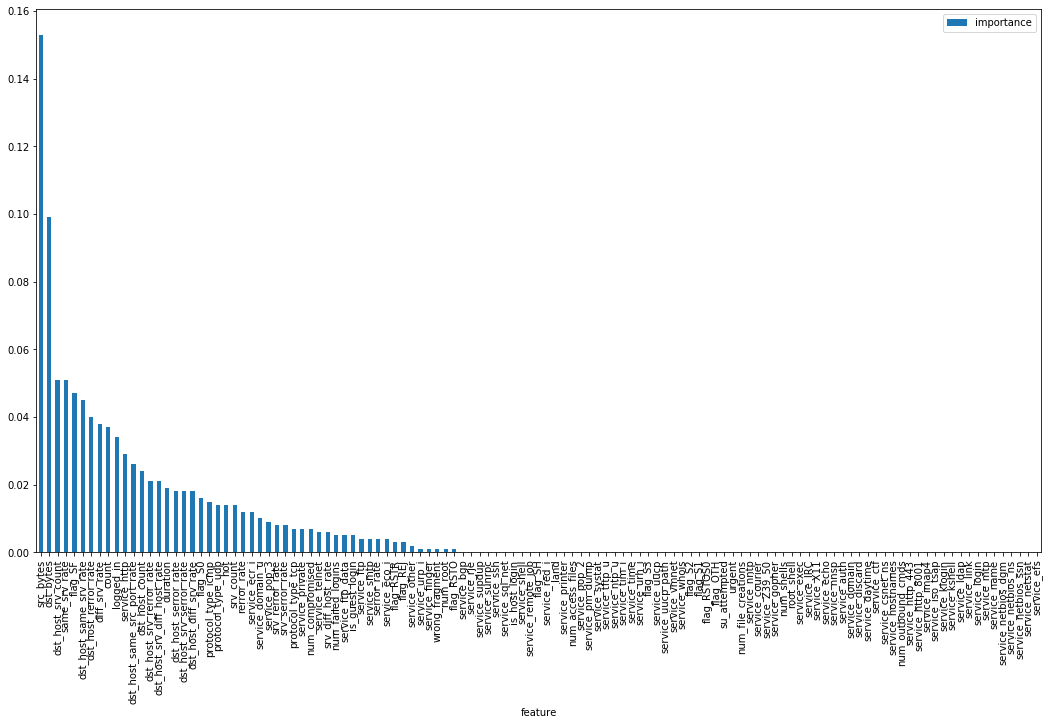

In [48]:
#this is the ranked order of the best variables in descending order
plt.rcParams['figure.figsize'] = (18, 10)
importances.plot.bar();

In [49]:
# Importting the Recursive feature elimation for the Random Forrest
from sklearn.feature_selection import RFE
#Rfe can iteratively build model on an algorithm over train data and prdouce the features with the best varibles
rfe=RFE(rfc1,n_features_to_select= 46)
rfe.fit(X_train_scaled,y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight=None, criterion='gini',
                                     max_depth=None, max_features='auto',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=None,
                                     oob_score=False, random_state=None,
                                     verbose=0, warm_start=False),
    n_features_to_select=46, step=1, verbose=0)

In [50]:
# The top features from the RFE 
feature_map = [(i, v) for i, v in zip(rfe.get_support(), X.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['count',
 'diff_srv_rate',
 'dst_bytes',
 'dst_host_count',
 'dst_host_diff_srv_rate',
 'dst_host_rerror_rate',
 'dst_host_same_src_port_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_count',
 'dst_host_srv_diff_host_rate',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_serror_rate',
 'duration',
 'flag_REJ',
 'flag_RSTR',
 'flag_S0',
 'flag_SF',
 'hot',
 'is_guest_login',
 'logged_in',
 'num_compromised',
 'num_failed_logins',
 'protocol_type_icmp',
 'protocol_type_tcp',
 'protocol_type_udp',
 'rerror_rate',
 'same_srv_rate',
 'serror_rate',
 'service_domain_u',
 'service_eco_i',
 'service_ecr_i',
 'service_finger',
 'service_ftp',
 'service_ftp_data',
 'service_http',
 'service_other',
 'service_pop_3',
 'service_private',
 'service_smtp',
 'service_telnet',
 'src_bytes',
 'srv_count',
 'srv_diff_host_rate',
 'srv_rerror_rate',
 'srv_serror_rate']

In [51]:
X_train_new = X_train[['count',
 'diff_srv_rate',
 'dst_bytes',
 'dst_host_count',
 'dst_host_diff_srv_rate',
 'dst_host_rerror_rate',
 'dst_host_same_src_port_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_count',
 'dst_host_srv_diff_host_rate',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_serror_rate',
 'duration',
 'flag_REJ',
 'flag_RSTR',
 'flag_S0',
 'flag_SF',
 'hot',
 'is_guest_login',
 'logged_in',
 'num_compromised',
 'num_failed_logins',
 'protocol_type_icmp',
 'protocol_type_tcp',
 'protocol_type_udp',
 'rerror_rate',
 'same_srv_rate',
 'serror_rate',
 'service_domain_u',
 'service_eco_i',
 'service_ecr_i',
 'service_finger',
 'service_ftp',
 'service_ftp_data',
 'service_http',
 'service_other',
 'service_pop_3',
 'service_private',
 'service_smtp',
 'service_telnet',
 'src_bytes',
 'srv_count',
 'srv_diff_host_rate',
 'srv_rerror_rate',
 'srv_serror_rate']]

In [52]:
X_test_new = X_test[['count',
 'diff_srv_rate',
 'dst_bytes',
 'dst_host_count',
 'dst_host_diff_srv_rate',
 'dst_host_rerror_rate',
 'dst_host_same_src_port_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_count',
 'dst_host_srv_diff_host_rate',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_serror_rate',
 'duration',
 'flag_REJ',
 'flag_RSTR',
 'flag_S0',
 'flag_SF',
 'hot',
 'is_guest_login',
 'logged_in',
 'num_compromised',
 'num_failed_logins',
 'protocol_type_icmp',
 'protocol_type_tcp',
 'protocol_type_udp',
 'rerror_rate',
 'same_srv_rate',
 'serror_rate',
 'service_domain_u',
 'service_eco_i',
 'service_ecr_i',
 'service_finger',
 'service_ftp',
 'service_ftp_data',
 'service_http',
 'service_other',
 'service_pop_3',
 'service_private',
 'service_smtp',
 'service_telnet',
 'src_bytes',
 'srv_count',
 'srv_diff_host_rate',
 'srv_rerror_rate',
 'srv_serror_rate']]

In [53]:
# Scaling the data
# Standar scaler will substract each observation from their mean and divide by its unit variance.
# This gives z score.

scaler = StandardScaler()
X_train_new_scaled=scaler.fit_transform(X_train_new)
X_test_new_scaled=scaler.transform(X_test_new)

In [67]:
 #Using Random Search to reate a grid of hyperparameters and train/test our model on just some random combination of these hyperparameters
# The main parameters used by a Random Forest Classifier are
# criterion = the function used to evaluate the quality of a split.
# max_depth = maximum number of levels allowed in each tree. This was set to range from 10 to 1200
# np.linspace() function. It returns evenly-spaced numbers and generate arrays with will start with 10 and stop at 1200
# dtype= The type of the output array in this cas asa an integer
# max_features = maximum number of features considered when splitting a node.
# min_samples_leaf = minimum number of samples which can be stored in a tree leaf
# min_samples_split = minimum number of samples necessary in a node to cause node splitting.
# n_estimators = number of trees in the ensemble.
# Cross-Validation will be implemtned in this section of the code 4 Folds (cv = 4)
# divide the training set into N other partitions to make sure our model is not overfitting the data.
# select 80 as the number of combinations to sample (n_iter = 80).
# IN skcit-learn the n_jobs=-1 to use all process
# verobse controls the verbosity: the higher, the more messages.
# dtype= The type of the output array in this cas asa an integer
from sklearn.model_selection import RandomizedSearchCV

random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}

# Buliding the classifer with Using the scikit-learn best_estimator_ attribute, to retrieve the set of hyperparameters 
# which performed best during training to test our model.

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 80, 
                               cv = 4, verbose= 2, random_state= 101, n_jobs = -1)

model.fit(X_train_new_scaled,y_train)


Fitting 4 folds for each of 80 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed: 18.1min finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [112]:
y_pred3 = model.best_estimator_.predict(X_test_new_scaled)
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))
print ('Random Forrest Random Search accuracy Score :',accuracy_score(y_test, y_pred3))

[[4736   38]
 [  39 4735]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4774
           1       0.99      0.99      0.99      4774

    accuracy                           0.99      9548
   macro avg       0.99      0.99      0.99      9548
weighted avg       0.99      0.99      0.99      9548

Random Forrest Random Search accuracy Score : 0.9919354838709677


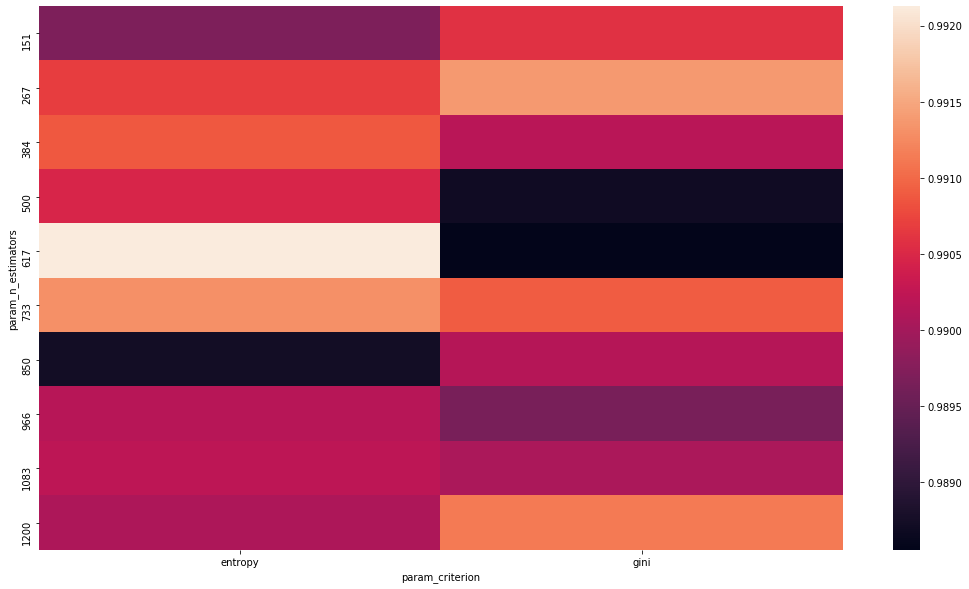

In [69]:
table = pd.pivot_table(pd.DataFrame(model.cv_results_),
    values='mean_test_score', index='param_n_estimators', 
                       columns='param_criterion')
     
sns.heatmap(table)

In [70]:
# This section of the code will be to implment the Random forrest Model and feature selection
# Making object of the model and setting its arameter
# The number of estimators will be 10
# There will be four sets of numbers of esitmators to test which one will gain the highest score

from sklearn.model_selection import GridSearchCV

grid_search = {
    'criterion': [model.best_params_['criterion']],
    'max_depth': [model.best_params_['max_depth']],
    'max_features': [model.best_params_['max_features']],
    'min_samples_leaf': [model.best_params_['min_samples_leaf'] - 2, 
                         model.best_params_['min_samples_leaf'], 
                         model.best_params_['min_samples_leaf'] + 2],
    'min_samples_split': [model.best_params_['min_samples_split'] - 3, 
                          model.best_params_['min_samples_split'], 
                          model.best_params_['min_samples_split'] + 3],
    'n_estimators': [model.best_params_['n_estimators'] - 150, 
                     model.best_params_['n_estimators'] - 100, 
                     model.best_params_['n_estimators'], 
                     model.best_params_['n_estimators'] + 100, 
                     model.best_params_['n_estimators'] + 150]
}

clf = RandomForestClassifier()
model = GridSearchCV(estimator = clf, param_grid = grid_search, 
                               cv = 4, verbose= 5, n_jobs = -1)
model.fit(X_train_new_scaled,y_train)

y_pred4 = model.best_estimator_.predict(X_test_new_scaled)
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))
acc4 = accuracy_score(y_test,y_pred3)
print ('Random Forrest Random Search accuracy Score :',accuracy_score(y_test, y_pred3))

Fitting 4 folds for each of 45 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 170 out of 180 | elapsed: 18.7min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 19.6min finished


[[4738   36]
 [  32 4742]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4774
           1       0.99      0.99      0.99      4774

    accuracy                           0.99      9548
   macro avg       0.99      0.99      0.99      9548
weighted avg       0.99      0.99      0.99      9548

Random Forrest Random Search accuracy Score : 0.9928780896522832


In [71]:
parameters = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [4, 12],
               'min_samples_split': [5, 10],
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}
               
tpot_classifier = TPOTClassifier(generations= 5, population_size= 24, offspring_size= 12,
                                 verbosity= 2,
                                 config_dict=
                                 {'sklearn.ensemble.RandomForestClassifier': parameters}, 
                                 cv = 10, scoring = 'accuracy')

tpot_classifier.fit(X_train_new_scaled,y_train) 

Generation 1 - Current best internal CV score: 0.9935843857001831
Generation 2 - Current best internal CV score: 0.9935843857001831
Generation 3 - Current best internal CV score: 0.9935843857001831
Generation 4 - Current best internal CV score: 0.9935843857001831
Generation 5 - Current best internal CV score: 0.9938724535081478

Best pipeline: RandomForestClassifier(CombineDFs(CombineDFs(input_matrix, input_matrix), input_matrix), criterion=entropy, max_depth=274, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500)


TPOTClassifier(config_dict={'sklearn.ensemble.RandomForestClassifier': {'criterion': ['entropy',
                                                                                      'gini'],
                                                                        'max_depth': [10,
                                                                                      142,
                                                                                      274,
                                                                                      406,
                                                                                      538,
                                                                                      671,
                                                                                      803,
                                                                                      935,
                                                                                 

In [72]:
acc5 = tpot_classifier.score(X_test_new_scaled, y_test)
print(acc5)

0.994449099287809


In [73]:
# Buliding the base line model of the KNN classfier 
knn = KNeighborsClassifier(n_neighbors = 1)


#Training the model with the new features .
knn.fit(X_train_new_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [74]:
y_pred2 = knn.predict(X_test_new_scaled)

print(confusion_matrix(y_test,y_pred2))

print(classification_report(y_test,y_pred2))

print ('KNN accuracy Score :',accuracy_score(y_test, y_pred2))

[[4708   66]
 [  47 4727]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4774
           1       0.99      0.99      0.99      4774

    accuracy                           0.99      9548
   macro avg       0.99      0.99      0.99      9548
weighted avg       0.99      0.99      0.99      9548

KNN accuracy Score : 0.9881650607457059


In [75]:
# Buliding the base line model of the KNN classfier 
knn = KNeighborsClassifier(n_neighbors = 5)


#Training the model with the new features .
knn.fit(X_train_new_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [76]:
y_pred3= knn.predict(X_test_new_scaled)

print(confusion_matrix(y_test,y_pred3))

print(classification_report(y_test,y_pred3))

print ('KNN accuracy Score :',accuracy_score(y_test, y_pred3))

[[4694   80]
 [  60 4714]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4774
           1       0.98      0.99      0.99      4774

    accuracy                           0.99      9548
   macro avg       0.99      0.99      0.99      9548
weighted avg       0.99      0.99      0.99      9548

KNN accuracy Score : 0.9853372434017595


In [77]:
# Buliding the base line model of the KNN classfier 
knn = KNeighborsClassifier(n_neighbors = 11)


#Training the model with the new features .
knn.fit(X_train_new_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [78]:
y_pred4= knn.predict(X_test_new_scaled)

print(confusion_matrix(y_test,y_pred4))

print(classification_report(y_test,y_pred4))

print ('KNN accuracy Score :',accuracy_score(y_test, y_pred4))

[[4675   99]
 [  77 4697]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4774
           1       0.98      0.98      0.98      4774

    accuracy                           0.98      9548
   macro avg       0.98      0.98      0.98      9548
weighted avg       0.98      0.98      0.98      9548

KNN accuracy Score : 0.9815668202764977


In [79]:
# Buliding the base line model of the KNN classfier 
knn = KNeighborsClassifier(n_neighbors = 15)


#Training the model with the new features .
knn.fit(X_train_new_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [80]:
y_pred5= knn.predict(X_test_new_scaled)

print(confusion_matrix(y_test,y_pred5))

print(classification_report(y_test,y_pred5))

print ('KNN accuracy Score :',accuracy_score(y_test, y_pred5))

[[4668  106]
 [  76 4698]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4774
           1       0.98      0.98      0.98      4774

    accuracy                           0.98      9548
   macro avg       0.98      0.98      0.98      9548
weighted avg       0.98      0.98      0.98      9548

KNN accuracy Score : 0.9809384164222874


In [ ]:

# search for an optimal value of K for KNN

# list of integers 1 to 50
# integers we want to try
k_range = range(1, 51)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    
        #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 
    
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
    
print(k_scores)


In [ ]:
#Generate plot
plt.title('KNN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [113]:
tpot_config = {
    
    'sklearn.neighbors.KNeighborsClassifier': {
        'n_neighbors': range(1, 10),
        'weights': ["uniform", "distance"],
        'p': [1, 2]
    },
}
    
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2,
                      config_dict=tpot_config)

tpot.fit(X_train_new_scaled, y_train)
print(tpot.score(X_test_new_scaled, y_test))
tpot.export('tpot_knn_pipeline.py')

Generation 1 - Current best internal CV score: 0.9894993342008593
Generation 2 - Current best internal CV score: 0.9894993342008593
Generation 3 - Current best internal CV score: 0.9894993342008593
Generation 4 - Current best internal CV score: 0.9894993342008593
Generation 5 - Current best internal CV score: 0.9894993342008593

Best pipeline: KNeighborsClassifier(input_matrix, n_neighbors=4, p=1, weights=distance)
0.9900502723083369


In [83]:
# Building the Naive Bayes Model 

nb = GaussianNB()

In [84]:
# Fitting the model 

nb.fit(X_train_new_scaled,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [85]:
y_pred6=nb.predict(X_test_new_scaled)

In [86]:
# Creating a confusion matrix of the model

results = confusion_matrix(y_test, y_pred6)
print('Confusion Matrix :')
print(results)

#this is test data accuracy
print ('Navie Bayes Accuracy Score :',accuracy_score(y_test, y_pred6))


#This is the classification report of the model performance
print('Classification Report : ')
print(classification_report(y_test, y_pred6))

Confusion Matrix :
[[4338  436]
 [ 427 4347]]
Navie Bayes Accuracy Score : 0.9096145789694177
Classification Report : 
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      4774
           1       0.91      0.91      0.91      4774

    accuracy                           0.91      9548
   macro avg       0.91      0.91      0.91      9548
weighted avg       0.91      0.91      0.91      9548



In [87]:

tpot_config = {
    'sklearn.naive_bayes.GaussianNB': {
    },

    'sklearn.naive_bayes.BernoulliNB': {
        'alpha': [1e-3, 1e-2, 1e-1, 1., 10., 100.],
        'fit_prior': [True, False]
    }

}

tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2,
                      config_dict=tpot_config)

tpot.fit(X_train_new_scaled, y_train)
print(tpot.score(X_test_new_scaled, y_test))
tpot.export('tpot_nb_pipeline.py')

Generation 1 - Current best internal CV score: 0.9100503114908631
Generation 2 - Current best internal CV score: 0.9100503114908631
Generation 3 - Current best internal CV score: 0.9100503114908631
Generation 4 - Current best internal CV score: 0.9100503114908631
Generation 5 - Current best internal CV score: 0.9100503114908631

Best pipeline: GaussianNB(BernoulliNB(BernoulliNB(input_matrix, alpha=0.1, fit_prior=True), alpha=1.0, fit_prior=True))
0.9123376623376623


In [88]:
print(tpot.score(X_test_new_scaled, y_test))

0.9123376623376623


In [95]:
dt = DecisionTreeClassifier()
dt.fit(X_train_new_scaled, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [96]:
y_pred6=dt.predict(X_test_new_scaled)

In [97]:
# Creating a confusion matrix of the model

results = confusion_matrix(y_test, y_pred6)
print('Confusion Matrix :')
print(results)

#this is test data accuracy
print ('Desicsion Tree Accuracy Score :',accuracy_score(y_test, y_pred6))


#This is the classification report of the model performance
print('Classification Report : ')
print(classification_report(y_test, y_pred6))

Confusion Matrix :
[[4516  258]
 [ 159 4615]]
Desicsion Tree Accuracy Score : 0.9563259321323837
Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      4774
           1       0.95      0.97      0.96      4774

    accuracy                           0.96      9548
   macro avg       0.96      0.96      0.96      9548
weighted avg       0.96      0.96      0.96      9548



In [92]:

tpot_config = {
    'sklearn.tree.DecisionTreeClassifier': {
        'criterion': ["gini", "entropy"],
        'max_depth': range(1, 11),
        'min_samples_split': range(2, 21),
        'min_samples_leaf': range(1, 21)
    },
}

tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2,
                      config_dict=tpot_config)

tpot.fit(X_train_new_scaled, y_train)
print(tpot.score(X_test_new_scaled, y_test))

tpot.export('tpot_dt_pipeline.py')

Generation 1 - Current best internal CV score: 0.9831622299657923
Generation 2 - Current best internal CV score: 0.9831622299657923
Generation 3 - Current best internal CV score: 0.9884257307290005
Generation 4 - Current best internal CV score: 0.9886352062214993
Generation 5 - Current best internal CV score: 0.9886352062214993

Best pipeline: DecisionTreeClassifier(CombineDFs(DecisionTreeClassifier(input_matrix, criterion=entropy, max_depth=8, min_samples_leaf=11, min_samples_split=14), DecisionTreeClassifier(input_matrix, criterion=gini, max_depth=7, min_samples_leaf=9, min_samples_split=4)), criterion=gini, max_depth=10, min_samples_leaf=10, min_samples_split=6)
0.9896313364055299
